In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import itertools
import seaborn as sns
from sklearn import *
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# STEP 2
df = pd.read_excel('version2database2015-2023_2.xlsx')
print(df.shape)
df.head()

(5778, 30)


,ID,home/away,HomeTeam,team,AwayTeam,team22,FTHG,FTAG,HTHG,HTAG,...,HR,AR,B365H,B365D,B365A,winner,totalgoles,rango_goles,EQUIPO,ESCALA
0,1,1,Malaga,0,Sevilla,18,0,0,0,0,...,0,1,3.40,3.4,2.15,1,0,0,Malaga,0.0
1,1,0,Sevilla,18,Malaga,0,0,0,0,0,...,1,0,2.15,3.4,3.40,1,0,0,Ath Madrid,1.0
2,2,1,Ath Madrid,1,Las Palmas,17,1,0,1,0,...,0,0,1.20,6.5,15.00,0,1,0,Espanol,2.0
3,2,0,Las Palmas,17,Ath Madrid,1,0,1,0,1,...,0,0,15.00,6.5,1.20,0,1,0,La Coruna,3.0
4,3,1,Espanol,2,Getafe,16,1,0,1,0,...,0,1,1.91,3.4,4.33,0,1,0,Vallecano,4.0


In [3]:
# Analyzing columns of dataframe
df.columns

Index(['ID', 'home/away', 'HomeTeam', 'team', 'AwayTeam', 'team22', 'FTHG',
       'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'winner',
       'totalgoles', 'rango_goles', 'EQUIPO', 'ESCALA'],
      dtype='object')

In [4]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)
df.columns

Index(['id', 'home/away', 'hometeam', 'team', 'awayteam', 'team22', 'fthg',
       'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc',
       'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'winner',
       'totalgoles', 'rango_goles', 'equipo', 'escala'],
      dtype='object')

In [5]:
df.describe(include='all')

,id,home/away,hometeam,team,awayteam,team22,fthg,ftag,hthg,htag,...,hr,ar,b365h,b365d,b365a,winner,totalgoles,rango_goles,equipo,escala
count,5778.000000,5778.000000,5778,5778.000000,5778,5778.000000,5778.000000,5778.000000,5778.000000,5778.000000,...,5778.000000,5778.000000,5778.000000,5778.000000,5778.000000,5778.000000,5778.000000,5778.000000,30,30.000000
unique,NaN,NaN,30,NaN,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
top,NaN,NaN,Celta,NaN,Sevilla,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malaga,NaN
freq,NaN,NaN,289,NaN,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,1445.000000,0.500000,NaN,12.813603,NaN,12.813603,1.310661,1.310661,0.572170,0.572170,...,0.119592,0.119592,3.806085,4.044978,3.806085,0.831083,2.621322,0.996885,NaN,14.500000
std,834.054592,0.500043,NaN,7.502008,NaN,7.502008,1.221338,1.221338,0.781295,0.781295,...,0.343682,0.343682,3.652610,1.633598,3.652610,0.842766,1.671449,0.731348,NaN,8.803408
min,1.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.020000,2.750000,1.020000,0.000000,0.000000,0.000000,NaN,0.000000
25%,723.000000,0.000000,NaN,6.000000,NaN,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.910000,3.250000,1.910000,0.000000,1.000000,0.000000,NaN,7.250000
50%,1445.000000,0.500000,NaN,13.000000,NaN,13.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.700000,3.500000,2.700000,1.000000,2.000000,1.000000,NaN,14.500000
75%,2167.000000,1.000000,NaN,19.000000,NaN,19.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,4.200000,4.000000,4.200000,2.000000,4.000000,2.000000,NaN,21.750000


In [6]:
# Categories of each feature
df.nunique()

id             2889
home/away         2
hometeam         30
team             30
awayteam         30
team22           30
fthg             10
ftag             10
hthg              6
htag              6
hs               35
as               35
hst              18
ast              18
hf               31
af               31
hc               19
ac               19
hy               10
ay               10
hr                3
ar                3
b365h           132
b365d            51
b365a           132
winner            3
totalgoles       12
rango_goles       3
equipo           30
escala           30
dtype: int64

In [7]:
df

,id,home/away,hometeam,team,awayteam,team22,fthg,ftag,hthg,htag,...,hr,ar,b365h,b365d,b365a,winner,totalgoles,rango_goles,equipo,escala
0,1,1,Malaga,0,Sevilla,18,0,0,0,0,...,0,1,3.40,3.40,2.15,1,0,0,Malaga,0.0
1,1,0,Sevilla,18,Malaga,0,0,0,0,0,...,1,0,2.15,3.40,3.40,1,0,0,Ath Madrid,1.0
2,2,1,Ath Madrid,1,Las Palmas,17,1,0,1,0,...,0,0,1.20,6.50,15.00,0,1,0,Espanol,2.0
3,2,0,Las Palmas,17,Ath Madrid,1,0,1,0,1,...,0,0,15.00,6.50,1.20,0,1,0,La Coruna,3.0
4,3,1,Espanol,2,Getafe,16,1,0,1,0,...,0,1,1.91,3.40,4.33,0,1,0,Vallecano,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,2887,0,Valladolid,24,Celta,12,0,3,0,2,...,1,0,5.25,3.75,1.70,0,3,1,NaN,NaN
5774,2888,1,Almeria,29,Barcelona,11,1,0,1,0,...,0,0,7.00,4.75,1.44,0,1,0,NaN,NaN
5775,2888,0,Barcelona,11,Almeria,29,0,1,0,1,...,0,0,1.44,4.75,7.00,0,1,0,NaN,NaN
5776,2889,1,Sevilla,18,Osasuna,21,2,3,0,1,...,1,0,1.85,3.25,4.50,2,5,2,NaN,NaN


In [8]:
predictors = ['id','hometeam', 'awayteam', 'equipo', 'escala']

In [9]:
df.drop(predictors, axis=1, inplace=True)

In [10]:
def find_team_averages(team):
    rolling = team.rolling(window=4, min_periods=1).mean().shift(1)
    return rolling

df_rolling = df.groupby(["team"], group_keys=False).apply(find_team_averages)

In [11]:
df_rolling

,home/away,team,team22,fthg,ftag,hthg,htag,hs,as,hst,...,hy,ay,hr,ar,b365h,b365d,b365a,winner,totalgoles,rango_goles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,0.5,24.0,15.00,0.75,0.50,0.25,0.5,13.75,15.25,4.00,...,3.50,2.75,0.00,0.00,5.0000,3.5700,2.0350,0.75,1.25,0.25
5774,0.5,29.0,8.75,1.75,3.00,0.50,1.5,16.25,11.75,6.25,...,2.25,2.50,0.00,0.00,3.6275,3.4625,2.3075,0.50,4.75,1.75
5775,0.5,11.0,15.25,2.00,0.25,0.75,0.0,13.00,8.25,4.75,...,1.50,3.00,0.00,0.25,1.5075,5.0125,7.5625,1.00,2.25,0.75
5776,0.5,18.0,17.25,1.50,1.00,1.50,0.0,11.75,11.50,4.25,...,2.25,2.25,0.00,0.25,3.7350,3.8875,3.8325,0.25,2.50,1.00


In [12]:
rolling_cols = [f"{col}_5" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df, df_rolling], axis=1)

In [13]:
df

,home/away,team,team22,fthg,ftag,hthg,htag,hs,as,hst,...,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,winner_5,totalgoles_5,rango_goles_5
0,1,0,18,0,0,0,0,25,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,18,0,0,0,0,0,10,25,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,17,1,0,1,0,14,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,17,1,0,1,0,1,8,14,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,16,1,0,1,0,4,14,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,0,24,12,0,3,0,2,6,18,3,...,3.50,2.75,0.00,0.00,5.0000,3.5700,2.0350,0.75,1.25,0.25
5774,1,29,11,1,0,1,0,7,14,4,...,2.25,2.50,0.00,0.00,3.6275,3.4625,2.3075,0.50,4.75,1.75
5775,0,11,29,0,1,0,1,14,7,1,...,1.50,3.00,0.00,0.25,1.5075,5.0125,7.5625,1.00,2.25,0.75
5776,1,18,21,2,3,0,1,22,11,8,...,2.25,2.25,0.00,0.25,3.7350,3.8875,3.8325,0.25,2.50,1.00


In [14]:
df = df.dropna()

In [15]:
df

,home/away,team,team22,fthg,ftag,hthg,htag,hs,as,hst,...,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,winner_5,totalgoles_5,rango_goles_5
20,1,10,2,3,1,0,1,14,4,4,...,1.00,3.00,1.00,0.00,2.6000,3.2500,2.8000,1.00,2.00,1.00
21,0,2,10,1,3,1,0,4,14,2,...,2.00,3.00,0.00,1.00,1.9100,3.4000,4.3300,0.00,1.00,0.00
22,1,11,0,1,0,0,0,22,4,13,...,3.00,3.00,0.00,0.00,1.5000,4.3300,6.5000,2.00,1.00,0.00
23,0,0,11,0,1,0,0,4,22,1,...,3.00,3.00,0.00,1.00,3.4000,3.4000,2.1500,1.00,0.00,0.00
24,1,12,4,3,0,1,0,11,3,7,...,3.00,1.00,0.00,1.00,2.1500,3.3000,3.6000,2.00,3.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,0,24,12,0,3,0,2,6,18,3,...,3.50,2.75,0.00,0.00,5.0000,3.5700,2.0350,0.75,1.25,0.25
5774,1,29,11,1,0,1,0,7,14,4,...,2.25,2.50,0.00,0.00,3.6275,3.4625,2.3075,0.50,4.75,1.75
5775,0,11,29,0,1,0,1,14,7,1,...,1.50,3.00,0.00,0.25,1.5075,5.0125,7.5625,1.00,2.25,0.75
5776,1,18,21,2,3,0,1,22,11,8,...,2.25,2.25,0.00,0.25,3.7350,3.8875,3.8325,0.25,2.50,1.00


In [16]:
df.columns

Index(['home/away', 'team', 'team22', 'fthg', 'ftag', 'hthg', 'htag', 'hs',
       'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar',
       'b365h', 'b365d', 'b365a', 'winner', 'totalgoles', 'rango_goles',
       'home/away_5', 'team_5', 'team22_5', 'fthg_5', 'ftag_5', 'hthg_5',
       'htag_5', 'hs_5', 'as_5', 'hst_5', 'ast_5', 'hf_5', 'af_5', 'hc_5',
       'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5', 'b365h_5', 'b365d_5', 'b365a_5',
       'winner_5', 'totalgoles_5', 'rango_goles_5'],
      dtype='object')

In [17]:
df.to_excel("datadepurada.xlsx", index=False)

In [18]:
# RUN OPTIONAL
df = pd.read_excel('datadepurada.xlsx')
print(df.shape)
df.head()

(5748, 50)


,home/away,team,team22,fthg,ftag,hthg,htag,hs,as,hst,...,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,winner_5,totalgoles_5,rango_goles_5
0,1,10,2,3,1,0,1,14,4,4,...,1.0,3.0,1.0,0.0,2.60,3.25,2.80,1.0,2.0,1.0
1,0,2,10,1,3,1,0,4,14,2,...,2.0,3.0,0.0,1.0,1.91,3.40,4.33,0.0,1.0,0.0
2,1,11,0,1,0,0,0,22,4,13,...,3.0,3.0,0.0,0.0,1.50,4.33,6.50,2.0,1.0,0.0
3,0,0,11,0,1,0,0,4,22,1,...,3.0,3.0,0.0,1.0,3.40,3.40,2.15,1.0,0.0,0.0
4,1,12,4,3,0,1,0,11,3,7,...,3.0,1.0,0.0,1.0,2.15,3.30,3.60,2.0,3.0,1.0


In [19]:
df.columns

Index(['home/away', 'team', 'team22', 'fthg', 'ftag', 'hthg', 'htag', 'hs',
       'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar',
       'b365h', 'b365d', 'b365a', 'winner', 'totalgoles', 'rango_goles',
       'home/away_5', 'team_5', 'team22_5', 'fthg_5', 'ftag_5', 'hthg_5',
       'htag_5', 'hs_5', 'as_5', 'hst_5', 'ast_5', 'hf_5', 'af_5', 'hc_5',
       'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5', 'b365h_5', 'b365d_5', 'b365a_5',
       'winner_5', 'totalgoles_5', 'rango_goles_5'],
      dtype='object')

In [20]:
df.nunique()

home/away           2
team               30
team22             30
fthg               10
ftag               10
hthg                6
htag                6
hs                 35
as                 35
hst                18
ast                18
hf                 31
af                 31
hc                 19
ac                 18
hy                 10
ay                 10
hr                  3
ar                  3
b365h             132
b365d              51
b365a             132
winner              3
totalgoles         12
rango_goles         3
home/away_5         7
team_5             30
team22_5          113
fthg_5             28
ftag_5             25
hthg_5             15
htag_5             14
hs_5               96
as_5               88
hst_5              50
ast_5              48
hf_5               82
af_5               85
hc_5               54
ac_5               57
hy_5               30
ay_5               31
hr_5                8
ar_5                7
b365h_5          3140
b365d_5   

In [21]:
#comando para mostrar todas las columnas del dataframe
pd.set_option('display.max_columns', None)

In [22]:
df.head()

,home/away,team,team22,fthg,ftag,hthg,htag,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar,b365h,b365d,b365a,winner,totalgoles,rango_goles,home/away_5,team_5,team22_5,fthg_5,ftag_5,hthg_5,htag_5,hs_5,as_5,hst_5,ast_5,hf_5,af_5,hc_5,ac_5,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,winner_5,totalgoles_5,rango_goles_5
0,1,10,2,3,1,0,1,14,4,4,2,10,20,2,3,1,6,0,0,1.57,3.80,6.50,0,4,2,0.0,10,6.0,1.0,1.0,1.0,0.0,8.0,22.0,4.0,6.0,26.0,11.0,5.0,7.0,1.0,3.0,1.0,0.0,2.60,3.25,2.80,1.0,2.0,1.0
1,0,2,10,1,3,1,0,4,14,2,4,20,10,3,2,6,1,0,0,6.50,3.80,1.57,0,4,2,1.0,2,16.0,1.0,0.0,1.0,0.0,4.0,14.0,2.0,3.0,19.0,14.0,5.0,6.0,2.0,3.0,0.0,1.0,1.91,3.40,4.33,0.0,1.0,0.0
2,1,11,0,1,0,0,0,22,4,13,1,4,21,15,2,0,3,0,0,1.10,10.00,26.00,0,1,0,0.0,11,5.0,1.0,0.0,0.0,0.0,10.0,8.0,4.0,2.0,11.0,16.0,4.0,2.0,3.0,3.0,0.0,0.0,1.50,4.33,6.50,2.0,1.0,0.0
3,0,0,11,0,1,0,0,4,22,1,13,21,4,2,15,3,0,0,0,26.00,10.00,1.10,0,1,0,1.0,0,18.0,0.0,0.0,0.0,0.0,25.0,10.0,5.0,2.0,19.0,11.0,7.0,2.0,3.0,3.0,0.0,1.0,3.40,3.40,2.15,1.0,0.0,0.0
4,1,12,4,3,0,1,0,11,3,7,0,7,11,5,4,2,2,0,1,1.53,4.33,6.00,0,3,1,0.0,12,7.0,2.0,1.0,1.0,0.0,15.0,11.0,6.0,2.0,17.0,12.0,6.0,4.0,3.0,1.0,0.0,1.0,2.15,3.30,3.60,2.0,3.0,1.0


In [25]:
predictors = ['fthg', 'ftag', 'hthg', 'htag',
              'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac',
              'hy', 'ay', 'hr', 'ar', 'home/away_5',
              'team_5','team22_5', 'winner_5', 'rango_goles_5']

In [26]:
df.drop(predictors, axis=1, inplace=True)

In [27]:
# Dropping ID column
df.drop(['winner'], axis=1, inplace=True)

In [28]:
# Dropping ID column
df.drop(['totalgoles'], axis=1, inplace=True)

In [29]:
df.dtypes

home/away         int64
team              int64
team22            int64
b365h           float64
b365d           float64
b365a           float64
rango_goles       int64
fthg_5          float64
ftag_5          float64
hthg_5          float64
htag_5          float64
hs_5            float64
as_5            float64
hst_5           float64
ast_5           float64
hf_5            float64
af_5            float64
hc_5            float64
ac_5            float64
hy_5            float64
ay_5            float64
hr_5            float64
ar_5            float64
b365h_5         float64
b365d_5         float64
b365a_5         float64
totalgoles_5    float64
dtype: object

In [30]:
df.head()

,home/away,team,team22,b365h,b365d,b365a,rango_goles,fthg_5,ftag_5,hthg_5,htag_5,hs_5,as_5,hst_5,ast_5,hf_5,af_5,hc_5,ac_5,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,totalgoles_5
0,1,10,2,1.57,3.80,6.50,2,1.0,1.0,1.0,0.0,8.0,22.0,4.0,6.0,26.0,11.0,5.0,7.0,1.0,3.0,1.0,0.0,2.60,3.25,2.80,2.0
1,0,2,10,6.50,3.80,1.57,2,1.0,0.0,1.0,0.0,4.0,14.0,2.0,3.0,19.0,14.0,5.0,6.0,2.0,3.0,0.0,1.0,1.91,3.40,4.33,1.0
2,1,11,0,1.10,10.00,26.00,0,1.0,0.0,0.0,0.0,10.0,8.0,4.0,2.0,11.0,16.0,4.0,2.0,3.0,3.0,0.0,0.0,1.50,4.33,6.50,1.0
3,0,0,11,26.00,10.00,1.10,0,0.0,0.0,0.0,0.0,25.0,10.0,5.0,2.0,19.0,11.0,7.0,2.0,3.0,3.0,0.0,1.0,3.40,3.40,2.15,0.0
4,1,12,4,1.53,4.33,6.00,1,2.0,1.0,1.0,0.0,15.0,11.0,6.0,2.0,17.0,12.0,6.0,4.0,3.0,1.0,0.0,1.0,2.15,3.30,3.60,3.0


In [31]:
df.columns

Index(['home/away', 'team', 'team22', 'b365h', 'b365d', 'b365a', 'rango_goles',
       'fthg_5', 'ftag_5', 'hthg_5', 'htag_5', 'hs_5', 'as_5', 'hst_5',
       'ast_5', 'hf_5', 'af_5', 'hc_5', 'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5',
       'b365h_5', 'b365d_5', 'b365a_5', 'totalgoles_5'],
      dtype='object')

In [32]:
cat_vars = ['home/away', 'team', 'team22', 'rango_goles']
for i in df[cat_vars]:
    df[i] = df[i].astype('category')
    print(i, '\n', df[i].value_counts(), '\n')

home/away 
 0    2874
1    2874
Name: home/away, dtype: int64 

team 
 19    288
11    288
18    288
1     288
14    288
5     288
6     288
13    288
12    288
10    287
2     250
16    249
22    227
7     227
15    227
9     189
21    174
20    151
4     136
24    136
0     113
17    113
3     113
23     98
26     98
27     98
28     98
8      75
25     75
29     22
Name: team, dtype: int64 

team22 
 11    288
19    288
18    288
5     288
6     288
14    287
10    287
12    287
13    287
1     286
2     250
16    249
22    228
7     227
15    225
9     189
21    174
20    152
24    137
4     136
17    113
3     113
0     112
26     99
27     99
28     99
23     98
25     76
8      75
29     23
Name: team22, dtype: int64 

rango_goles 
 1    2677
0    1538
2    1533
Name: rango_goles, dtype: int64 



In [33]:
df.dtypes

home/away       category
team            category
team22          category
b365h            float64
b365d            float64
b365a            float64
rango_goles     category
fthg_5           float64
ftag_5           float64
hthg_5           float64
htag_5           float64
hs_5             float64
as_5             float64
hst_5            float64
ast_5            float64
hf_5             float64
af_5             float64
hc_5             float64
ac_5             float64
hy_5             float64
ay_5             float64
hr_5             float64
ar_5             float64
b365h_5          float64
b365d_5          float64
b365a_5          float64
totalgoles_5     float64
dtype: object

In [34]:
df.columns

Index(['home/away', 'team', 'team22', 'b365h', 'b365d', 'b365a', 'rango_goles',
       'fthg_5', 'ftag_5', 'hthg_5', 'htag_5', 'hs_5', 'as_5', 'hst_5',
       'ast_5', 'hf_5', 'af_5', 'hc_5', 'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5',
       'b365h_5', 'b365d_5', 'b365a_5', 'totalgoles_5'],
      dtype='object')

In [35]:
# Concat is neccesary for the transformation of the database, but this function is used to transformate numerical datas in categorical datas
df_mod = pd.concat([df[['tm', 'op', 'win', 'home_away', 'sot_5', 'crdy_5', 'blocks_5', 'xg_5',
       'npxg_5', 'xag_5', 'cmp%_5', 'prgc_5', 'succ_5', 'gls.1_5', 'sot.1_5',
       'crdy.1_5', 'tkl.1_5', 'int.1_5', 'blocks.1_5', 'xg.1_5', 'xag.1_5',
       'cmp%.1_5', 'prgp.1_5', 'carries.1_5', 'prgc.1_5', 'att.3_5',
       'succ.1_5']]], axis=1)
for i in cat_vars:
    df_mod[i] = df[i].cat.codes
df_mod.head()

,tm,op,win,home_away,sot_5,crdy_5,blocks_5,xg_5,npxg_5,xag_5,...,int.1_5,blocks.1_5,xg.1_5,xag.1_5,cmp%.1_5,prgp.1_5,carries.1_5,prgc.1_5,att.3_5,succ.1_5
0,9,2,2,1,0.0,3.0,4.0,0.6,0.6,0.4,...,6.0,5.0,0.5,0.4,74.1,23.0,219.0,14.0,8.0,4.0
1,2,10,2,0,2.0,1.0,6.0,0.6,0.6,0.2,...,12.0,5.0,1.0,0.3,81.0,47.0,309.0,17.0,12.0,7.0
2,3,1,0,1,3.0,1.0,9.0,1.7,0.9,0.7,...,16.0,16.0,1.7,1.4,87.5,67.0,546.0,20.0,19.0,14.0
3,1,3,1,0,2.0,1.0,5.0,0.5,0.5,0.4,...,10.0,4.0,0.6,0.4,86.7,60.0,443.0,22.0,13.0,5.0
4,10,8,2,1,3.0,3.0,14.0,0.5,0.5,0.4,...,6.0,9.0,0.9,0.4,71.5,44.0,286.0,18.0,17.0,10.0


In [35]:
df.dtypes

home/away       category
team            category
team22          category
b365h            float64
b365d            float64
b365a            float64
rango_goles     category
fthg_5           float64
ftag_5           float64
hthg_5           float64
htag_5           float64
hs_5             float64
as_5             float64
hst_5            float64
ast_5            float64
hf_5             float64
af_5             float64
hc_5             float64
ac_5             float64
hy_5             float64
ay_5             float64
hr_5             float64
ar_5             float64
b365h_5          float64
b365d_5          float64
b365a_5          float64
totalgoles_5     float64
dtype: object

In [36]:
df.columns

Index(['home/away', 'team', 'team22', 'b365h', 'b365d', 'b365a', 'rango_goles',
       'fthg_5', 'ftag_5', 'hthg_5', 'htag_5', 'hs_5', 'as_5', 'hst_5',
       'ast_5', 'hf_5', 'af_5', 'hc_5', 'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5',
       'b365h_5', 'b365d_5', 'b365a_5', 'totalgoles_5'],
      dtype='object')

In [28]:
# new 6
print(selected_features)

['int_5' 'tkl_5' 'blocks.1_5' 'prgp_5' 'att.1_5' 'succ_5' 'op' 'blocks_5'
 'cmp%.1_5' 'att.3_5' 'xag_5' 'int.1_5' 'prgc.1_5' 'tkl.1_5' 'xg.1_5'
 'succ.1_5' 'carries.1_5' 'cmp%_5' 'xag.1_5' 'npxg_5' 'sca.1_5' 'prgc_5'
 'carries_5' 'prgp.1_5' 'crdy_5']


In [32]:
# new
predictors2 = ['npxg.1_5', 'gls_5', 'ast_5', 'pk_5', 'pkatt_5', 'sh_5',
       'crdr_5', 'touches_5', 'tkl_5', 'int_5',
       'sca_5', 'gca_5', 'cmp_5', 'att_5', 'prgp_5', 'carries_5',
       'att.1_5', 'ast.1_5', 'pk.1_5',
       'pkatt.1_5', 'sh.1_5', 'crdr.1_5', 'touches.1_5',
       'sca.1_5', 'gca.1_5', 'cmp.1_5',
       'att.2_5']

In [33]:
df.drop(predictors2, axis=1, inplace=True)

In [87]:
df.columns

Index(['home/away', 'team', 'team22', 'p>2.5', 'p<2.5', 'max>2.5', 'max<2.5',
       'avg>2.5', 'avg<2.5', 'ahh',
       ...
       'ahch_5', 'b365cahh_5', 'b365caha_5', 'pcahh_5', 'pcaha_5', 'maxcahh_5',
       'maxcaha_5', 'avgcahh_5', 'avgcaha_5', 'totalgoles_5'],
      dtype='object', length=147)

In [37]:
df.head()

,home/away,team,team22,b365h,b365d,b365a,rango_goles,fthg_5,ftag_5,hthg_5,htag_5,hs_5,as_5,hst_5,ast_5,hf_5,af_5,hc_5,ac_5,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,totalgoles_5
0,1,10,2,1.57,3.80,6.50,2,1.0,1.0,1.0,0.0,8.0,22.0,4.0,6.0,26.0,11.0,5.0,7.0,1.0,3.0,1.0,0.0,2.60,3.25,2.80,2.0
1,0,2,10,6.50,3.80,1.57,2,1.0,0.0,1.0,0.0,4.0,14.0,2.0,3.0,19.0,14.0,5.0,6.0,2.0,3.0,0.0,1.0,1.91,3.40,4.33,1.0
2,1,11,0,1.10,10.00,26.00,0,1.0,0.0,0.0,0.0,10.0,8.0,4.0,2.0,11.0,16.0,4.0,2.0,3.0,3.0,0.0,0.0,1.50,4.33,6.50,1.0
3,0,0,11,26.00,10.00,1.10,0,0.0,0.0,0.0,0.0,25.0,10.0,5.0,2.0,19.0,11.0,7.0,2.0,3.0,3.0,0.0,1.0,3.40,3.40,2.15,0.0
4,1,12,4,1.53,4.33,6.00,1,2.0,1.0,1.0,0.0,15.0,11.0,6.0,2.0,17.0,12.0,6.0,4.0,3.0,1.0,0.0,1.0,2.15,3.30,3.60,3.0


In [38]:
# Splitting data in X and Y
y = df['rango_goles']
X = df.drop('rango_goles',axis = 1)

In [21]:
# new 1
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [22]:
# new 2
importances = rf.feature_importances_

In [23]:
# new 3
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = importances

In [24]:
# new 4
features = features.sort_values('importance', ascending=False)

In [25]:
#new 5
selected_features = features.head(25)['feature'].values

In [26]:
# new 6
print(selected_features)

['int_5' 'tkl_5' 'blocks.1_5' 'prgp_5' 'att.1_5' 'succ_5' 'op' 'blocks_5'
 'cmp%.1_5' 'att.3_5' 'xag_5' 'int.1_5' 'prgc.1_5' 'tkl.1_5' 'xg.1_5'
 'succ.1_5' 'carries.1_5' 'cmp%_5' 'xag.1_5' 'npxg_5' 'sca.1_5' 'prgc_5'
 'carries_5' 'prgp.1_5' 'crdy_5']


In [ ]:
# new 7
data_selected = data.loc[:, selected_features]

In [38]:
df.to_csv('ptsdatabase2.csv')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, 'b365h'),
  Text(0, 1.5, 'b365d'),
  Text(0, 2.5, 'b365a'),
  Text(0, 3.5, 'fthg_5'),
  Text(0, 4.5, 'ftag_5'),
  Text(0, 5.5, 'hthg_5'),
  Text(0, 6.5, 'htag_5'),
  Text(0, 7.5, 'hs_5'),
  Text(0, 8.5, 'as_5'),
  Text(0, 9.5, 'hst_5'),
  Text(0, 10.5, 'ast_5'),
  Text(0, 11.5, 'hf_5'),
  Text(0, 12.5, 'af_5'),
  Text(0, 13.5, 'hc_5'),
  Text(0, 14.5, 'ac_5'),
  Text(0, 15.5, 'hy_5'),
  Text(0, 16.5, 'ay_5'),
  Text(0, 17.5, 'hr_5'),
  Text(0, 18.5, 'ar_5'),
  Text(0, 19.5, 'b365h_5'),
  Text(0, 20.5, 'b365d_5'),
  Text(0, 21.5, 'b365a_5'),
  Text(0, 22.5, 'totalgoles_5')])

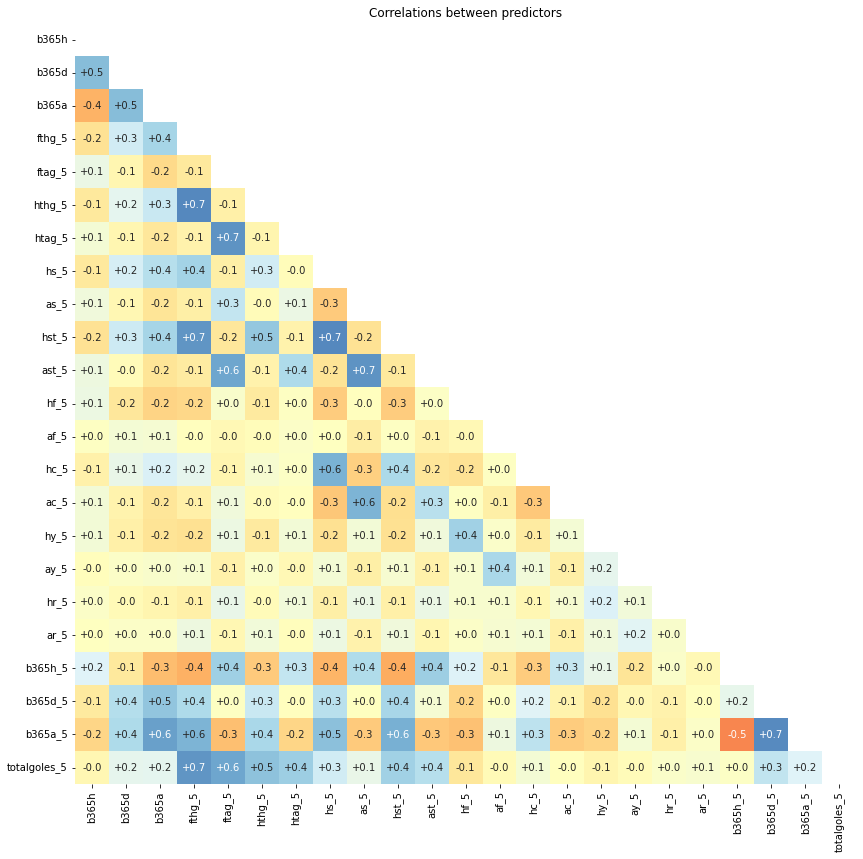

In [39]:
plt.figure(figsize=(14,14))
Correlation = X.corr()

mask = np.zeros(Correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(Correlation, cmap='RdYlBu', annot=True, fmt="+.1f", vmin = -1, vmax = 1, center = 0, cbar=False, mask=mask)

plt.title("Correlations between predictors")
plt.yticks(rotation=0)

In [40]:
# Splitting data in training and test data
seed = 42
test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=seed)
print('Shape of X_train: ', X_train.shape, ' and y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape, ' and y_test: ', y_test.shape)

Shape of X_train:  (4598, 26)  and y_train:  (4598,)
Shape of X_test:  (1150, 26)  and y_test:  (1150,)


In [28]:
# define models and parameters con todas las variables
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in tqdm(zip(means, stds, params)):
    print("mean: %f, stdev: (%f), with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 15 candidates, totalling 450 fits
Best: 0.477617 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


15it [00:00, ?it/s]

mean: 0.430829, stdev: (0.026968), with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
mean: 0.456633, stdev: (0.019696), with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
mean: 0.434248, stdev: (0.025704), with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
mean: 0.432531, stdev: (0.022198), with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
mean: 0.457107, stdev: (0.020979), with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
mean: 0.436725, stdev: (0.023046), with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
mean: 0.444348, stdev: (0.019762), with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
mean: 0.456323, stdev: (0.019193), with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
mean: 0.448853, stdev: (0.018309), with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
mean: 0.461291, stdev: (0.014259), with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
mean: 0.460521, stdev: (0.017260), with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
mean: 0

In [33]:
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best: 0.395450 using {'alpha': 1.0}
0.395006 (0.039801) with: {'alpha': 0.1}
0.395006 (0.039801) with: {'alpha': 0.2}
0.395006 (0.039801) with: {'alpha': 0.3}
0.395006 (0.039801) with: {'alpha': 0.4}
0.395006 (0.039801) with: {'alpha': 0.5}
0.395006 (0.039801) with: {'alpha': 0.6}
0.395006 (0.039801) with: {'alpha': 0.7}
0.394567 (0.040306) with: {'alpha': 0.8}
0.395006 (0.040662) with: {'alpha': 0.9}
0.395450 (0.041220) with: {'alpha': 1.0}


In [32]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 60 candidates, totalling 1800 fits
Best: 0.368158 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
0.328596 (0.052321) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.328596 (0.052321) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.336766 (0.046497) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.338596 (0.047290) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.360608 (0.048301) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.349158 (0.038320) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.353520 (0.045237) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.339439 (0.047909) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.359287 (0.041129) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.356678 (0.047451) with: {'metric':

In [31]:
# define model and parameters
model = SVC()
kernel = ['rbf', 'sigmoid']
C = [10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 8 candidates, totalling 240 fits
Best: 0.441211 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.439889 (0.007706) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.337363 (0.051493) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.441211 (0.005505) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.403836 (0.039100) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.441211 (0.005505) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.441211 (0.005505) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.441211 (0.005505) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.441211 (0.005505) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 20, 30, 100, 500, 1000]
max_samples = [2, 3, 5, 10, 20, 30]
bootstrap = ['True', 'False']
bootstrap_features = ['True', 'False']
max_features = [1, 2, 5, 10]

# define grid search
grid = dict(n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, bootstrap=bootstrap, bootstrap_features=bootstrap_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 576 candidates, totalling 17280 fits


In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Comparison of all better tunned classifiers with the better settings
models = []

models.append(('LR', LogisticRegression(C=100, penalty='l2', solver='liblinear')))
models.append(('Ridge', RidgeClassifier(alpha=0.1)))
models.append(('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='uniform') ))
models.append(('SVM', SVC(C=10, gamma='scale', kernel='rbf') ))
models.append(('BDT', BaggingClassifier(bootstrap=True, bootstrap_features=False, max_features=10, max_samples=30, n_estimators=1000) ))
models.append(('RF', RandomForestClassifier(max_features='sqrt', n_estimators=1000) ))
models.append(('GB', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1.0)))

#Evaluating each model
results = []
names = []

for name, model in tqdm(models):
    kfold = KFold(n_splits=10, random_state=None, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: mean: %f, std: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Comparing all the models
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
# Select the most accuracy model
LRC = RandomForestClassifier(max_features='sqrt', n_estimators=1000).fit(X_train,y_train)

In [42]:
yhat = LRC.predict(X_test)
yhat[0:20]

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
      dtype=int64)

In [43]:
yhat_prob = LRC.predict_proba(X_test)
yhat_prob

array([[0.21 , 0.501, 0.289],
       [0.333, 0.5  , 0.167],
       [0.249, 0.474, 0.277],
       ...,
       [0.356, 0.499, 0.145],
       [0.171, 0.511, 0.318],
       [0.405, 0.455, 0.14 ]])

In [49]:
f1_score(y_test, yhat, average=None)

array([0.05, 0.61, 0.16])

In [50]:
# Defining plot_confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.1 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [51]:
cnf_matrix = confusion_matrix(y_test, yhat)
cnf_matrix

array([[  9, 291,  12],
       [ 16, 476,  46],
       [ 12, 256,  32]], dtype=int64)

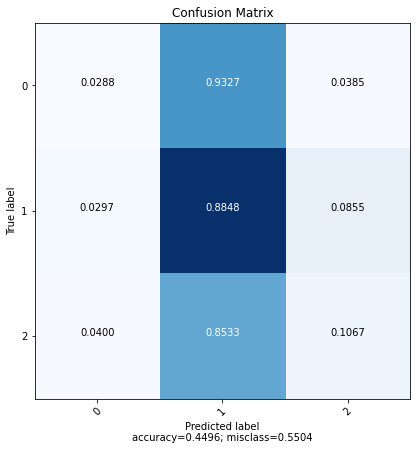

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, 
                      normalize    = True,
                      target_names = ['0', '1', '2'],
                      title        = "Confusion Matrix")

plt.figure(figsize=(10, 10))

In [53]:
df_train = pd.concat([X_train,y_train], axis=1).reset_index()
df_train.drop(['index'], axis=1, inplace=True)
print(df_train.columns)
df_train.head()

Index(['home/away', 'team', 'team22', 'b365h', 'b365d', 'b365a', 'fthg_5',
       'ftag_5', 'hthg_5', 'htag_5', 'hs_5', 'as_5', 'hst_5', 'ast_5', 'hf_5',
       'af_5', 'hc_5', 'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5', 'b365h_5',
       'b365d_5', 'b365a_5', 'totalgoles_5', 'rango_goles'],
      dtype='object')


,home/away,team,team22,b365h,b365d,b365a,fthg_5,ftag_5,hthg_5,htag_5,hs_5,as_5,hst_5,ast_5,hf_5,af_5,hc_5,ac_5,hy_5,ay_5,hr_5,ar_5,b365h_5,b365d_5,b365a_5,totalgoles_5,rango_goles
0,1,18,5,1.67,3.80,5.25,1.25,0.25,0.25,0.25,12.50,13.00,4.00,4.50,15.00,15.25,5.50,1.75,2.75,2.50,0.00,0.00,1.8000,3.8250,5.0250,1.50,0
1,0,10,17,2.10,3.50,3.50,0.50,1.00,0.50,0.50,10.75,8.75,3.75,2.25,13.75,16.00,4.50,4.50,4.50,2.25,0.00,0.00,2.5100,3.3975,3.5500,1.50,1
2,1,19,7,2.10,3.50,3.50,0.75,0.75,0.50,0.25,10.75,13.75,3.50,4.00,8.25,13.75,6.00,3.00,1.75,2.00,0.25,0.25,2.4575,3.4250,3.8750,1.50,2
3,0,14,10,5.00,3.75,1.73,1.25,1.25,1.25,0.50,8.75,11.00,3.00,4.75,11.75,17.00,4.00,5.25,2.25,3.50,0.25,0.00,3.9325,3.9450,2.9550,2.50,0
4,0,10,2,2.37,3.20,3.20,0.50,1.75,0.00,1.25,7.75,14.25,2.75,5.25,11.25,13.50,4.25,5.00,2.50,2.25,0.25,0.00,3.0825,4.1375,4.6125,2.25,0


In [54]:
# Separate classes
df_0a1 = df_train[df_train.rango_goles==0]
df_2a3 = df_train[df_train.rango_goles==1]
df_4omas = df_train[df_train.rango_goles==2]

print('Shape of df_1etapa: ', df_0a1.shape)
print('Shape of df_2etapas: ', df_2a3.shape)
print('Shape of df_3etapasomas: ', df_4omas.shape)

Shape of df_1etapa:  (1226, 27)
Shape of df_2etapas:  (2139, 27)
Shape of df_3etapasomas:  (1233, 27)


In [55]:
# Upsample minority classes

df_0a1_upsampled = resample(df_0a1, 
                              replace=True,                  # sample with replacement
                              n_samples=df_2a3.shape[0],    # to match majority class
                              random_state=42)               # reproducible results

df_4omas_upsampled = resample(df_4omas, 
                              replace=True,                  # sample with replacement
                              n_samples=df_2a3.shape[0],    # to match majority class
                              random_state=42)

In [56]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([df_0a1_upsampled, df_4omas_upsampled, df_2a3])

# Display new class counts
df_upsampled.rango_goles.value_counts()

0    2139
1    2139
2    2139
Name: rango_goles, dtype: int64

In [57]:
# Splitting data in X and Y
y_train = df_upsampled["rango_goles"]
X_train = df_upsampled.drop(['rango_goles'],axis = 1)

In [58]:
LRC = RandomForestClassifier(max_features='sqrt', n_estimators=100).fit(X_train,y_train)

In [59]:
yhat = LRC.predict(X_test)
yhat[0:20]

array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
      dtype=int64)

In [60]:
yhat_prob = LRC.predict_proba(X_test)
yhat_prob

array([[0.14, 0.59, 0.27],
       [0.26, 0.52, 0.22],
       [0.17, 0.57, 0.26],
       ...,
       [0.34, 0.52, 0.14],
       [0.17, 0.49, 0.34],
       [0.37, 0.47, 0.16]])

In [62]:
f1_score(y_test, yhat, average=None)

array([0.14, 0.59, 0.22])

In [63]:
# RFC Model
LRC_model = 'LALIGA_MODEL.sav'
pickle.dump(LRC, open(LRC_model, 'wb')) # Just save the model once

In [64]:
LRC_model = pickle.load(open('LALIGA_MODEL.sav', 'rb'))

In [65]:
X.columns

Index(['home/away', 'team', 'team22', 'b365h', 'b365d', 'b365a', 'fthg_5',
       'ftag_5', 'hthg_5', 'htag_5', 'hs_5', 'as_5', 'hst_5', 'ast_5', 'hf_5',
       'af_5', 'hc_5', 'ac_5', 'hy_5', 'ay_5', 'hr_5', 'ar_5', 'b365h_5',
       'b365d_5', 'b365a_5', 'totalgoles_5'],
      dtype='object')

In [31]:
# Parameters to predict
# Insert values in the following order: 'xg', 'npxg', 'xag', 'xg.1', 'xag.1', 'tm', 'op', 'sot_5', 'crdy_5',
       #'blocks_5', 'cmp%_5', 'prgc_5', 'succ_5', 'gls.1_5', 'sot.1_5',
       #'crdy.1_5', 'tkl.1_5', 'int.1_5', 'blocks.1_5', 'cmp%.1_5', 'prgp.1_5',
       #'carries.1_5', 'prgc.1_5', 'att.3_5', 'succ.1_5'

# new_params_to_predict = X_test.iloc[:1] # Put here your sample
new_params_to_predict = np.stack([23, 34, 37, 1, 22, 1, 3, 34, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, -10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(1, 21)
new_params_to_predict

array([[ 23,  34,  37,   1,  22,   1,   3,  34,   0,   0,   0,   0,   0,
          0,   1,   1,   0,   0,   0,   0, -10]])

In [32]:
# Predicting the probability of 3P
predicted_new_values = LRC_model.predict(new_params_to_predict)
proba_new_values = LRC_model.predict_proba(new_params_to_predict)

print('The probability of 0 PTS is: ', round(proba_new_values[0][0]*100, 2),'%')
print('The probability of 1-5 PTS is: ', round(proba_new_values[0][1]*100, 2),'%')
print('The probability of 6-10 PTS is: ', round(proba_new_values[0][2]*100, 2),'%')
print('The probability of 11-15 PTS is: ', round(proba_new_values[0][3]*100, 2),'%')
print('The probability of 16-20 PTS is: ', round(proba_new_values[0][4]*100, 2),'%')
print('The probability of 21-25 PTS is: ', round(proba_new_values[0][5]*100, 2),'%')
print('The probability of 26-30 PTS is: ', round(proba_new_values[0][6]*100, 2),'%')
print('The probability of 31-35 PTS is: ', round(proba_new_values[0][7]*100, 2),'%')
print('The probability of 36-40 PTS is: ', round(proba_new_values[0][8]*100, 2),'%')
print('The probability of 41-50 PTS is: ', round(proba_new_values[0][9]*100, 2),'%')
print('The probability of >=51 PTS is: ', round(proba_new_values[0][10]*100, 2),'%')

The probability of 0 PTS is:  100.0 %
The probability of 1-5 PTS is:  0.0 %
The probability of 6-10 PTS is:  0.0 %
The probability of 11-15 PTS is:  0.0 %
The probability of 16-20 PTS is:  0.0 %
The probability of 21-25 PTS is:  0.0 %
The probability of 26-30 PTS is:  0.0 %
The probability of 31-35 PTS is:  0.0 %
The probability of 36-40 PTS is:  0.0 %
The probability of 41-50 PTS is:  0.0 %
The probability of >=51 PTS is:  0.0 %


C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
